# No `class`

* Classes and OOP
    * What
    * Why...or why not?
* Data Structures
    * Basics
    * `collections` - Container datatypes
        * JSON, YAML
        * [namedtupled](https://namedtupled.readthedocs.io/en/latest/)
    * Got `class`

# No `class`

## Classes and OOP - Down with OOP?


#### What
    * Mostly a collection of properties along with stuff you want to do to those properties
    * Make it easy to work with groups of those collections
    
#### Why
    * Extensibility
    * [Design Patterns](http://rads.stackoverflow.com/amzn/click/0201633612)
    * Big projects
    * All the cool kids
    
#### Why not?
    * Why?

### Quintessential Point

In [1]:
class Point(object):
    def __init__(self, x, y, z=0):
        self.x = x
        self.y = y
        self.z = z
        
    def move(self, x=0, y=0, z=0):
        """ Translate a point """
        self.x += x
        self.y += y
        self.z += z
        
    def __add__(self, point):
        """ Add point to self """
        x = self.x + point.x
        y = self.y + point.y
        z = self.z + point.z
        return Point(x,y,z)        
            
    def __mul__(self, point):
        """ Multiply self by point """
        x = self.x * point.x
        y = self.y * point.y
        z = self.z * point.z
        return Point(x,y,z) 
    
    def __str__(self):
        return "({:3}, {:3}, {:3})".format(self.x,self.y,self.z)

In [2]:
p0 = Point(42,12,39)
print("p0 = ", p0)

p0.move(x=9,z=-23)
print("p0 = ", p0)

print()

p1 = Point(10,10,p0.z)
print("p1 = ", p1)

p2 = p0 * p1
print("p2 = ", p2)

print()
print("p2.x = {} \t p0.z = {}".format(p2.x, p0.z))

p0 =  ( 42,  12,  39)
p0 =  ( 51,  12,  16)

p1 =  ( 10,  10,  16)
p2 =  (510, 120, 256)

p2.x = 510 	 p0.z = 16


### And now, a full example...

Let's make a class to make our life easier! Yay! [Exoplanet Class example](Exoplanet+Info.ipynb)

### But first...Data Structures!

---
## Basics
---

In [3]:
from astropy.time import Time
from astropy import units as u
from pprint import pprint
import random
import numpy as np
from matplotlib import pyplot as plt

##### Lists

Flexible, but usually a homogoeneous collection of things

[More on lists](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists)

In [4]:
flux_values = [100.12, 102.3, 99.0, 145.0, 13564]
print(flux_values)

filters = ['r','g','b']
print(filters)

[100.12, 102.3, 99.0, 145.0, 13564]
['r', 'g', 'b']


##### Dictonaries

Key/value pair collection. Values (and keys!) can be other data types

[More on dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

In [5]:
# Create a dictonary for an observation
observations = {
    "date-obs": Time("2017-06-03T12:34:56.0"),
    "filters": filters,
    "flux": []
}
pprint(observations)

{'date-obs': <Time object: scale='utc' format='isot' value=2017-06-03T12:34:56.000>,
 'filters': ['r', 'g', 'b'],
 'flux': []}


In [6]:
# Assign random flux values
for dt in np.arange(100):
    observations['flux'].append({
        'date-obs': observations['date-obs'] + (dt * u.second), 
        'r': random.randint(70, 150) * .9, 
        'g': random.randint(70, 150) * .97, 
        'b': random.randint(70, 150) * .8
    })

In [7]:
pprint(observations)

{'date-obs': <Time object: scale='utc' format='isot' value=2017-06-03T12:34:56.000>,
 'filters': ['r', 'g', 'b'],
 'flux': [{'b': 73.60000000000001,
           'date-obs': <Time object: scale='utc' format='isot' value=2017-06-03T12:34:56.000>,
           'g': 74.69,
           'r': 112.5},
          {'b': 97.60000000000001,
           'date-obs': <Time object: scale='utc' format='isot' value=2017-06-03T12:34:57.000>,
           'g': 130.95,
           'r': 129.6},
          {'b': 58.400000000000006,
           'date-obs': <Time object: scale='utc' format='isot' value=2017-06-03T12:34:58.000>,
           'g': 85.36,
           'r': 112.5},
          {'b': 82.4,
           'date-obs': <Time object: scale='utc' format='isot' value=2017-06-03T12:34:59.000>,
           'g': 81.48,
           'r': 110.7},
          {'b': 83.2,
           'date-obs': <Time object: scale='utc' format='isot' value=2017-06-03T12:35:00.000>,
           'g': 121.25,
           'r': 89.10000000000001},
          {'

In [8]:
r = [entry['r'] for entry in observations['flux']]
g = [entry['g'] for entry in observations['flux']]
b = [entry['b'] for entry in observations['flux']]

domain = slice(0, 20)

plt.plot(r[domain], 'r')
plt.plot(g[domain], 'g')
plt.plot(b[domain], 'b')

##### `tuple`s and `set`s

A `tuple` is usually heterogeneous and is immutable. Compare to a `list`, which usually is homogenous values and is mutable

A `set` has unique elements

In [9]:
# Tuple
params = (42.0, 'g', '14:25:20') # Value, filter, time
print(params[2])
print(params[0])
print()

# Can be unpacked
dt, filter_name, t = params
print("{} seconds on filter {} at {}".format(dt, filter_name, t))

14:25:20
42.0

42.0 seconds on filter g at 14:25:20


In [10]:
# Sets
filters_used = ['u', 'r','u', 'g','r','r','g','i','z','y','o','u','']
print(filters_used)

filters_used = {'u', 'r','u', 'g','r','r','g','i','z','y','o','u'}
print(filters_used)

['u', 'r', 'u', 'g', 'r', 'r', 'g', 'i', 'z', 'y', 'o', 'u', '']
{'r', 'y', 'g', 'z', 'o', 'i', 'u'}


## `collections`

The [`collections`](https://docs.python.org/3.6/library/collections.html) module is part of the standard library and contains a few extra "container datatypes" that can be useful.

##### OrderedDict

A dictonary...but ordered!

In [11]:
from collections import OrderedDict

# regular unsorted dictionary
d = {'banana': 3, 'apple': 4, 'pear': 1, 'orange': 2}
print(d)

# dictionary sorted by key
od = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
print(od)

{'apple': 4, 'pear': 1, 'banana': 3, 'orange': 2}
OrderedDict([('apple', 4), ('banana', 3), ('orange', 2), ('pear', 1)])


##### `deque`

A left-to-right queue. [From the docs]:(https://docs.python.org/3.6/library/collections.html#collections.deque):

*Deques are a generalization of stacks and queues (the name is pronounced “deck” and is short for “double-ended queue”). Deques support thread-safe, memory efficient appends and pops from either side of the deque with approximately the same O(1) performance in either direction.*

*Though list objects support similar operations, they are optimized for fast fixed-length operations and incur O(n) memory movement costs for pop(0) and insert(0, v) operations which change both the size and position of the underlying data representation.*

In [12]:
from collections import deque
import itertools

def moving_average(iterable, n=3):
    # moving_average([40, 30, 50, 46, 39, 44]) --> 40.0 42.0 45.0 43.0
    # http://en.wikipedia.org/wiki/Moving_average
    it = iter(iterable)
    d = deque(itertools.islice(it, n-1))
    d.appendleft(0)
    s = sum(d)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / n

In [13]:
# Do a moving average
values = [random.random() for x in np.arange(100)]
ma = [x1 for x1 in moving_average(values)]
print(ma[0:5])        

[0.6682883628616377, 0.713290933064815, 0.4961258426226709, 0.3640964300697986, 0.5326833570256937]


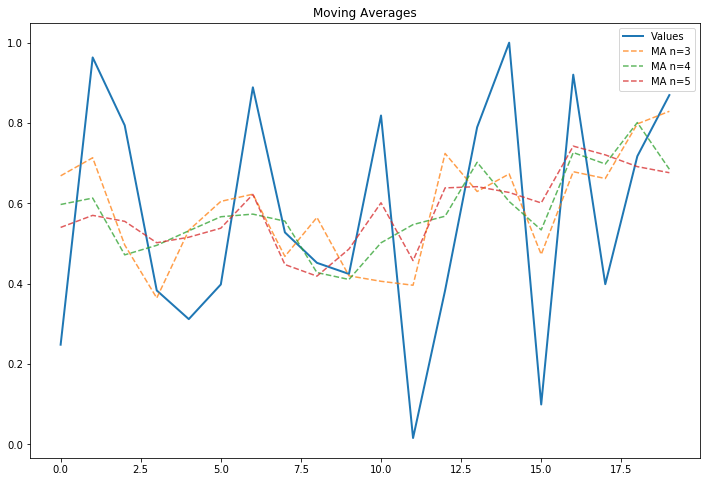

In [14]:
%matplotlib inline
domain = slice(0, 20)

plt.figure(figsize=(12,8))

plt.plot(values[domain], lw=2, label='Values')

for n in [3,4,5]:
        plt.plot(
            [x1 for x1 in moving_average(values, n=n)][domain], 
            '--', 
            alpha=0.75, 
            label='MA n={}'.format(n)
        )
plt.legend()
plt.title("Moving Averages")

##### `Counter`

Count stuff

In [15]:
from collections import Counter

filters_used = ['u','i','z','y','o','u','r','u', 'g','r','r','g','i','z','y','o','u']
print(filters_used)
print()

c = Counter(filters_used)

for f in c.most_common(3):
    print("Filter: {} Count: {}".format(
        f[0], f[1])  # Access the elements like a tuple
    )

['u', 'i', 'z', 'y', 'o', 'u', 'r', 'u', 'g', 'r', 'r', 'g', 'i', 'z', 'y', 'o', 'u']

Filter: u Count: 4
Filter: r Count: 3
Filter: y Count: 2


##### namedtuple

More than a `dict`, it's `namedtuple`! For more excitement, read [here](https://docs.python.org/3.6/library/collections.html#collections.namedtuple)!

In [16]:
from collections import namedtuple

Observation = namedtuple('Observation', ['date', 'filters', 'flux'])

obs_broad = Observation(Time("2017-06-03T12:34:56.0"), filters, flux=[])
obs_narrow = Observation(Time("2017-06-03T12:34:56.0"), ['H-α'], flux=[])

print(obs_broad)
print(obs_narrow)

Observation(date=<Time object: scale='utc' format='isot' value=2017-06-03T12:34:56.000>, filters=['r', 'g', 'b'], flux=[])
Observation(date=<Time object: scale='utc' format='isot' value=2017-06-03T12:34:56.000>, filters=['H-α'], flux=[])


In [17]:
for dt in np.arange(100):
    obs_broad.flux.append({
        'date-obs': obs_broad.date + (dt * u.second), 
        'r': random.randint(70, 150) * .9, 
        'g': random.randint(70, 150) * .97, 
        'b': random.randint(70, 150) * .8
    })
    
for flux in obs_broad.flux[0:3]:           # Observation namedtuple has dot (.) access
    print("R: {:6.02f}".format(flux['r'])) # Regular dictionary is key access

R: 132.30
R: 117.00
R:  93.60


### JSON and YAML

String representations of basic data structures. Have a dictionary in Python and want to load it in R. Or Java? Or Fortran 95? 

Have one script which scrubs your data, another that calibrates, and one that processes? Want to store metadata between runs? Need to configure the script?

In [18]:
import json
import yaml

##### YAML

YAML files are very human-readable. Good for configuration files for your scripts

In [19]:
# Show what the files looks like
fn = 'targets.yaml'
!head -n 17 $fn

-
    name: Kepler 1100
    position: 19h27m29.10s +44d05m15.00s
    priority: 125
-
    name: KIC 8462852
    position: 20h06m15.4536s +44d27m24.75s
    priority: 200
-
    name: HD 189733
    position: 20h00m43.713s +22d42m39.07s
    priority: 105
    exp_time: 100
-
    name: HD 209458
    position: 22h03m10.7721s +18d53m03.543s
    priority: 100


In [20]:
# Load the file as yaml
with open(fn) as f:
    targets = yaml.load(f.read())

In [21]:
# We now have a list of dictonaries, each with paramters for the targets
pprint(targets)

[{'name': 'Kepler 1100',
  'position': '19h27m29.10s +44d05m15.00s',
  'priority': 125},
 {'name': 'KIC 8462852',
  'position': '20h06m15.4536s +44d27m24.75s',
  'priority': 200},
 {'exp_time': 100,
  'name': 'HD 189733',
  'position': '20h00m43.713s +22d42m39.07s',
  'priority': 105},
 {'name': 'HD 209458',
  'position': '22h03m10.7721s +18d53m03.543s',
  'priority': 100},
 {'name': 'Wasp 140', 'position': '04h01m32.54s -20d27m03.9s', 'priority': 100},
 {'name': 'Wasp 104', 'position': '10h42m24.61s +07d26m06.3s', 'priority': 100},
 {'name': 'Wasp 44', 'position': '00h15m36.76s -11d56m17.4s', 'priority': 100},
 {'name': 'Wasp 2', 'position': '20h30m54.0s +06d25m46.0s', 'priority': 100},
 {'name': 'Wasp 24',
  'position': '15h08m51.739s +02d20m35.95s',
  'priority': 100},
 {'name': 'Wasp 77', 'position': '02h28m37.22s -07d03m38.45s', 'priority': 100},
 {'name': 'Wasp 33',
  'position': '02h26m51.0582s +37d33m01.733s',
  'priority': 100},
 {'name': 'Wasp 43',
  'position': '10h19m38.008

In [22]:
# Get info by array index and key name
targets[7]['name']

'Wasp 2'

Config files are great examples for YAML. (But see `namedtupled` below!)

In [23]:
# Load the file as yaml
with open('config.yaml') as f:
    config = yaml.load(f.read())

In [24]:
config["location"]

{'elevation': 3400.0,
 'gmt_offset': -600,
 'horizon': 30,
 'latitude': 19.54,
 'longitude': -155.58,
 'name': 'Mauna Loa Observatory',
 'timezone': 'US/Hawaii',
 'twilight_horizon': -18,
 'utc_offset': -10.0}

##### JSON

Similar to YAML in that it stores objects. It is a little more strict. Good for machine-readable code. Can be formatted to print pretty.

In [25]:
json.dumps(targets)

'[{"priority": 125, "position": "19h27m29.10s +44d05m15.00s", "name": "Kepler 1100"}, {"priority": 200, "position": "20h06m15.4536s +44d27m24.75s", "name": "KIC 8462852"}, {"priority": 105, "exp_time": 100, "position": "20h00m43.713s +22d42m39.07s", "name": "HD 189733"}, {"priority": 100, "position": "22h03m10.7721s +18d53m03.543s", "name": "HD 209458"}, {"priority": 100, "position": "04h01m32.54s -20d27m03.9s", "name": "Wasp 140"}, {"priority": 100, "position": "10h42m24.61s +07d26m06.3s", "name": "Wasp 104"}, {"priority": 100, "position": "00h15m36.76s -11d56m17.4s", "name": "Wasp 44"}, {"priority": 100, "position": "20h30m54.0s +06d25m46.0s", "name": "Wasp 2"}, {"priority": 100, "position": "15h08m51.739s +02d20m35.95s", "name": "Wasp 24"}, {"priority": 100, "position": "02h28m37.22s -07d03m38.45s", "name": "Wasp 77"}, {"priority": 100, "position": "02h26m51.0582s +37d33m01.733s", "name": "Wasp 33"}, {"priority": 100, "position": "10h19m38.008s -09d48m22.59s", "name": "Wasp 43"}, {"

##### namedtupled

Ohh, shiny. Read more [here](https://namedtupled.readthedocs.io/en/latest/).

In [26]:
import namedtupled

In [27]:
stars = namedtupled.map(targets)

In [28]:
stars[7].name

'Wasp 2'

In [29]:
good_stars = ['Kepler 1100', 'M44']

for star in stars:
    if star.name in good_stars:
        print("{:15s} {}".format(star.name, star.position)) # Access by name

Kepler 1100     19h27m29.10s +44d05m15.00s
M44             08h40m24s +19d40m00.12s


In [30]:
# Do the same thing directly from a file
stars2 = namedtupled.yaml(path=fn)

for star in stars2:
    print("{:20} {:4}\t{}".format(
        star.name, 
        star.priority, 
        star.position
    ))

Kepler 1100           125	19h27m29.10s +44d05m15.00s
KIC 8462852           200	20h06m15.4536s +44d27m24.75s
HD 189733             105	20h00m43.713s +22d42m39.07s
HD 209458             100	22h03m10.7721s +18d53m03.543s
Wasp 140              100	04h01m32.54s -20d27m03.9s
Wasp 104              100	10h42m24.61s +07d26m06.3s
Wasp 44               100	00h15m36.76s -11d56m17.4s
Wasp 2                100	20h30m54.0s +06d25m46.0s
Wasp 24               100	15h08m51.739s +02d20m35.95s
Wasp 77               100	02h28m37.22s -07d03m38.45s
Wasp 33               100	02h26m51.0582s +37d33m01.733s
Wasp 43               100	10h19m38.008s -09d48m22.59s
Wasp 36               100	08h46m19.30s -08d01m36.7s
Wasp 11               100	03h09m28.54s +30d40m26.0s
Wasp 35               100	05h04m19.56s -06d13m47.2s
HAT-P-20              100	07h27m39.89s +24d20m14.7s
Qatar-1               100	20h13m32.0s +65d09m43.0s
Qatar-2               100	13h50m37.409s -06d48m14.4101s
Tres 3                200	17h52m07.02s +37d

In [31]:
stars[7].name

'Wasp 2'

What about the config file?

In [32]:
config = namedtupled.yaml(path='config.yaml')

print("{} unit location: {}".format(
    config.name, 
    config.location.name
))

PAN007 unit location: Mauna Loa Observatory


But what if we want to do stuff with these parameters and collections?

### And now, a full example...

Let's make a class to make our life easier! Yay! [Exoplanet Class example](Exoplanet+Info.ipynb)